##### Import dependencies

In [462]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Exercise 1: Linear regression

Prices per square for old apartment houses in Turku (Source: Tilastokeskus)

In [463]:
price = [1699, 1715, 1765, 1782, 1792, 1824, 1845, 1914, 1952];
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018];

Gradient descent

In [521]:
def gradientDescent(cost, gradient, initial, alpha, iters, history_delta):
   position = initial;
   cost_history = [];
   for i in range(iters): 
      position = position - alpha*gradient(position);
      if(((i + 1) % history_delta) == 0):  
         print(f"iteration = {i+1} , cost = {cost(position)}");
         cost_history.append(cost(position));    
   return [position, cost_history];

Initialize variables and scale features

In [454]:
x_org = np.array(year);
y_org = np.array(price);
# feature scaling
x = (x_org - np.min(x_org))/(np.max(x_org)-np.min(x_org));
y = (y_org - np.min(y_org))/(np.max(y_org)-np.min(y_org));

initial = np.array([0, 0]);

In [455]:
def cost(position):
    alpha = position[0];
    beta = position[1];
    m = y.shape[0];
    return 1/(2*m)*np.sum(np.square(alpha*x+beta-y));

print("cost: " + str(cost(initial)));

cost: 0.1452269732902144


Cost should be around: 0.1452269732902144

In [456]:
def gradient(position):
    alpha = position[0];
    beta = position[1];
    m = y.shape[0];
    delta_alpha = (1/m)*np.sum(np.multiply(alpha*x+beta-y,x));
    delta_beta = (1/m)*np.sum(alpha*x+beta-y);
    return np.array([delta_alpha, delta_beta]);

Test the gradient. Difference with approximation and calculated value should be close to zero.

In [457]:
e = 0.0001
approx = [(cost(initial+[e, 0])-cost(initial))/e, (cost(initial+[0, e])-cost(initial))/e]
value = gradient(initial)
print(f"approx = {approx}, value = {value}, diff = {(approx-value)/value}")

approx = [-0.3183288002309159, -0.43780682916133573], value = [-0.31834651 -0.43785683], diff = [-5.56259689e-05 -1.14192577e-04]


In [458]:
[[alpha, beta], cost_history] = gradientDescent(cost, gradient, initial, 1, 100, 10)
print(f"alpha = {alpha}, beta = {beta}")

iteration = 10 , cost = 0.007371304600662321, position = [0.63407462 0.13510142]
iteration = 20 , cost = 0.0029113682622553816, position = [0.81806964 0.03490119]
iteration = 30 , cost = 0.002103421930298153, position = [ 0.89638229 -0.00774686]
iteration = 40 , cost = 0.0019570572232988784, position = [ 0.92971409 -0.02589893]
iteration = 50 , cost = 0.0019305423093650687, position = [ 0.94390094 -0.03362491]
iteration = 60 , cost = 0.0019257389611035177, position = [ 0.94993921 -0.03691327]
iteration = 70 , cost = 0.0019248688034790452, position = [ 0.95250925 -0.03831288]
iteration = 80 , cost = 0.0019247111687937797, position = [ 0.95360312 -0.03890859]
iteration = 90 , cost = 0.0019246826122503449, position = [ 0.9540687  -0.03916214]
iteration = 100 , cost = 0.001924677439047687, position = [ 0.95426686 -0.03927005]
alpha = 0.9542668597788185, beta = -0.03927005345575051


Price at year 2030 is estimated to be 2292.638465285798:f.2


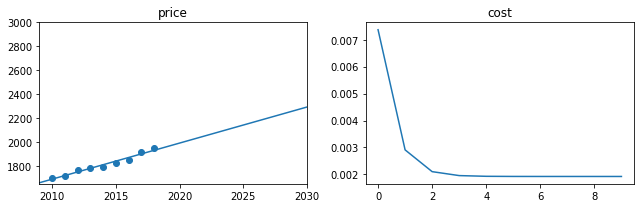

In [459]:
scaled_x = (np.array([2009, 2030]) - np.min(x_org))/(np.max(x_org)-np.min(x_org));
calculated_prices = (alpha*scaled_x+beta)*(np.max(y_org)-np.min(y_org))+np.min(y_org)
plt.figure(figsize=(9,3))

plt.subplot(1, 2, 1);
plt.title("price")
plt.scatter(year,price);
plt.plot([2009, 2030], calculated_prices);
#plt.plot([2009, 2030], initial[0]*np.array([2009, 2030])+initial[1]);
plt.xlim([2009, 2030]);
plt.ylim([1650, 3000]);

plt.subplot(1, 2, 2);
plt.title("cost")
plt.plot(cost_history);

plt.tight_layout()

print(f"Price at year 2030 is estimated to be {calculated_prices[1]}:f.2")

### Exercise 2: Linear regression + MNIST

Import [MNIST data](http://yann.lecun.com/exdb/mnist/) and convert from int to float

In [466]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [482]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

initial_theta = np.zeros(x_train.shape[1])

(784,)

In [508]:
def cost(theta):
    m = y_train.shape[0];
    return 1/(2*m)*np.sum(np.square(np.dot(x_train, theta)-y_train));

print("cost: " + str(cost(initial_theta)));

cost: 14.092633333333334


In [509]:
def gradient(theta):
    m = y_train.shape[0];
    XthetaMinusY = np.dot(x_train, theta)-y_train
    return (1/m)*np.dot(XthetaMinusY, x_train);

print(f"gradient.shape = {gradient(initial_theta).shape}")
print(f"gradient = {gradient(initial_theta)}")

gradient.shape = (784,)
gradient = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.67973856e-05 -1.27843137e-04 -2.82352941e-05 -1.17647059e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.27450980e-06 -2.15686275e-05 -2.18431373e-04 -5.67189542e-04
 -9.55686275e-04 -1.41516340e-03 -2.66771242e-03 -3.54483660e-03
 -3.89620915e-03 -3.98339869e-03 -4.04209150e-03 -3.60535948e-03
 -3.75457516e-03 -3.34692810e-03 -2.33686275e-03 -1.67607843e-03
 -1.26627451e-03 -5.02745098e-04 -2.37254902e-04 -8.31372549e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.50980392e-05 -5.098

Test the gradient. Difference with approximation and calculated value should be close to zero.

In [515]:
e = 1e-9
add_e = np.zeros(784);
add_e[13] = e;
approx = (cost(initial_theta+add_e)-cost(initial_theta))/e
value = gradient(initial_theta)[13]
print(f"approx = {approx}, value = {value}, diff = {(approx-value)/value}")

approx = -0.00012789769243681803, value = -0.00012784313725490196, diff = 0.00042673531866868354


In [ ]:
[theta, cost_history] = gradientDescent(cost, gradient, initial_theta, 1e-2, 10000, 500);


iteration = 500 , cost = 2.1071376590097555
iteration = 1000 , cost = 2.02830134940885
iteration = 1500 , cost = 1.9872193626079182
iteration = 2000 , cost = 1.9610789191134699
iteration = 2500 , cost = 1.9427528155819729
iteration = 3000 , cost = 1.9291394038191554
iteration = 3500 , cost = 1.9186323716055624
iteration = 4000 , cost = 1.9102975257700205
iteration = 4500 , cost = 1.9035460222192413
iteration = 5000 , cost = 1.8979847457884147
iteration = 5500 , cost = 1.8933398669058688
iteration = 6000 , cost = 1.8894143299264636
iteration = 6500 , cost = 1.886062607465827


In [ ]:
plt.title("cost")
plt.plot(cost_history);

### Exercise 2: Tensorflow and Neural networks

In [496]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [497]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

ValueError: Error when checking input: expected flatten_3_input to have 3 dimensions, but got array with shape (60000, 784)